In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [3]:
cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }
blue_red1 = mpl.colors.LinearSegmentedColormap('BlueRed1', cdict1)

In [4]:
blue_red1_r = reverse_colourmap(blue_red1)

In [5]:
blue_red1_r

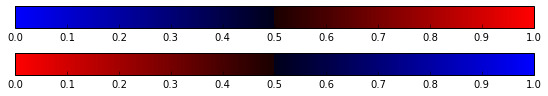

In [6]:
fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = blue_red1, norm=norm,orientation='horizontal')
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap = blue_red1_r, norm=norm, orientation='horizontal')

In [17]:
cmap = mpl.cm.jet

In [18]:
cmap_r = reverse_colourmap(cmap)

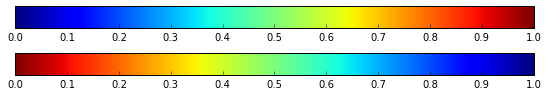

In [19]:
fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = cmap, norm=norm,orientation='horizontal')
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap = cmap_r, norm=norm, orientation='horizontal')